<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/Mini_VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: CIFAR from inbuilt in Keras
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: VGG based CNN with Fully Connected 
    Optimizer:SGD with 0.01, momentum=0.9, decay=0.01/25 and nesterov=True
    Results: 78 to 80 % Accurate
    Total Parameters : 106,538 Parameters
    Total Convolution Layer : 4
```
#### Done by shriarul643@gmail.com

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(trainData,trainLabel),(testData,testLabel) = cifar10.load_data()
print(trainData.shape)
print(trainLabel.shape)
print(testData.shape)
print(testLabel.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
Target_Labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
trainData = trainData.astype('float')/255
testData  = testData.astype('float')/255

le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

In [5]:
model = Sequential([Conv2D(32,(3,3,),padding = 'same',input_shape=(32,32,3)),
                    Activation('relu'),
                    # BatchNormalization(axis=-1),
                    Conv2D(32,(3,3),padding='same'),
                    Activation('relu'),
                    # BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Conv2D(64,(3,3),padding='same'),
                    Activation('relu'),
                    # BatchNormalization(axis=-1),
                    Conv2D(64,(3,3),padding='same'),
                    Activation('relu'),
                    # BatchNormalization(axis=-1),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Flatten(),
                    # Dense(512,activation='relu'),
                    # BatchNormalization(),
                    Dense(10,activation='softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [7]:
opt = SGD(0.01,momentum=0.9,decay=0.01/25,nesterov=True)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
H = model.fit(trainData,trainLabel,batch_size=32,epochs=50,validation_data=(testData,testLabel))

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8875 - accuracy: 0.3080 - val_loss: 1.3173 - val_accuracy: 0.5401
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2759 - accuracy: 0.5409 - val_loss: 1.1068 - val_accuracy: 0.6074
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0759 - accuracy: 0.6171 - val_loss: 0.9403 - val_accuracy: 0.6684
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9722 - accuracy: 0.6579 - val_loss: 0.8700 - val_accuracy: 0.6953
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9005 - accuracy: 0.6814 - val_loss: 0.8117 - val_accuracy: 0.7177
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8451 - accuracy: 0.7037 - val_loss: 0.7963 - val_accuracy: 0.7197
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8018 - accuracy: 0.7195 - val_loss: 0.7435 - val_accuracy:

In [9]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.5741 - accuracy: 0.8008
Accuracy is 80.08


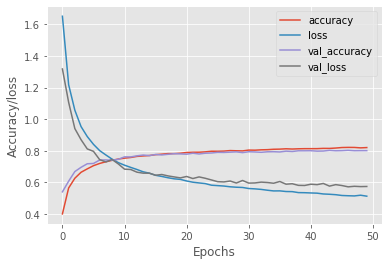

In [10]:
plt.style.use('ggplot')
fig = plt.figure()
plt.plot(np.arange(0,50),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,50),H.history['loss'],label='loss')
plt.plot(np.arange(0,50),H.history['val_accuracy'],label='val_accuracy')
plt.plot(np.arange(0,50),H.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy/loss')
plt.show()

In [11]:
predict = model.predict(testData)
print(classification_report(testLabel.argmax(axis=1),predict.argmax(axis=1),target_names=Target_Labels))

              precision    recall  f1-score   support

    airplane       0.83      0.81      0.82      1000
  automobile       0.92      0.89      0.90      1000
        bird       0.77      0.65      0.70      1000
         cat       0.64      0.64      0.64      1000
        deer       0.75      0.77      0.76      1000
         dog       0.73      0.72      0.72      1000
        frog       0.80      0.89      0.84      1000
       horse       0.85      0.84      0.85      1000
        ship       0.86      0.92      0.89      1000
       truck       0.86      0.89      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



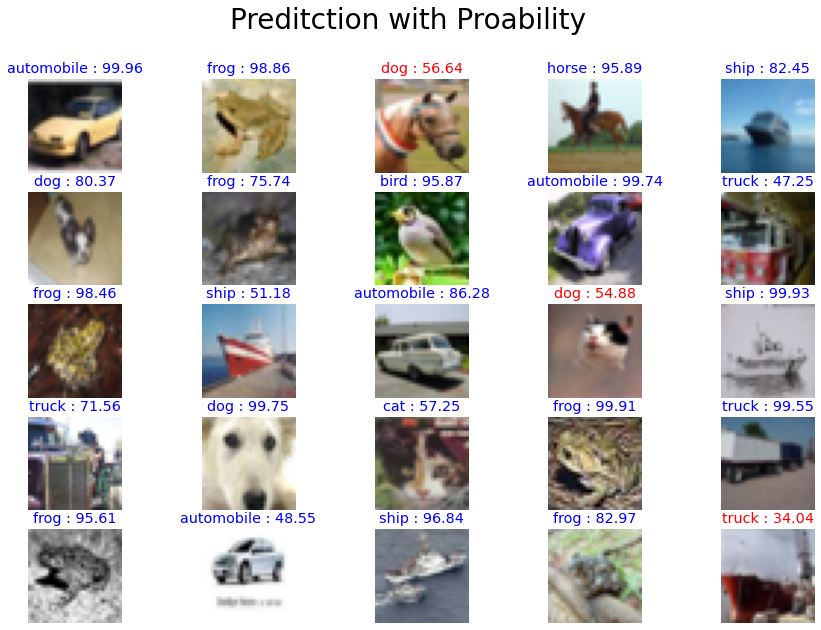

In [12]:
fig  = plt.figure(figsize=(15,10))
RandomIndex = np.random.randint(0,testData.shape[0],size=(25,))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j],cmap=plt.cm.binary)
  plt.axis('off')
  predicted = predict[j].argmax()
  actual = testLabel[j].argmax()
  if actual == predicted :
    color = 'blue'
  else:
    color = 'red'
  plt.title('{} : {:.2f}'.format(Target_Labels[predicted],predict[j].max()*100),color=color)

plt.suptitle('Preditction with Proability',fontsize=28)
plt.show()